# IMDB Datasets

In [60]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [61]:
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [62]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [63]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 1s 9ms/step - loss: 0.5801 - acc: 0.6877 - val_loss: 0.3788 - val_acc: 0.8708
Epoch 2/5
118/118 [==============================] - 1s 6ms/step - loss: 0.3750 - acc: 0.8545 - val_loss: 0.2930 - val_acc: 0.8857
Epoch 3/5
118/118 [==============================] - 1s 6ms/step - loss: 0.2785 - acc: 0.9003 - val_loss: 0.2775 - val_acc: 0.8862
Epoch 4/5
118/118 [==============================] - 1s 6ms/step - loss: 0.2213 - acc: 0.9221 - val_loss: 0.3077 - val_acc: 0.8810
Epoch 5/5
118/118 [==============================] - 1s 6ms/step - loss: 0.1802 - acc: 0.9363 - val_loss: 0.3113 - val_acc: 0.8846


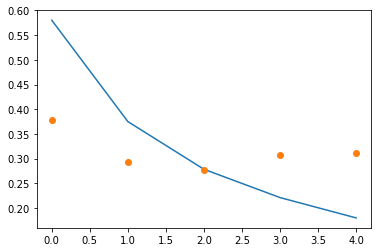

In [64]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [65]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3344 - acc: 0.8763


# IMDB Classification using simple RNN

In [66]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [67]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32])

In [68]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True'))

In [69]:
rnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          1568      
Total params: 161,568
Trainable params: 161,568
Non-trainable params: 0
_________________________________________________________________


In [70]:
y_train[0]

1

In [80]:
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
        591,  202,   14,   31,    6,  717,   10,   10,    2,    2,    5,
          4,  360,    7,    4,  177, 5760,  394,  354,    4,  123,    9,
       1035, 1035, 1035,   10,   10,   13,   92,  124,   89,  488, 7944,
        100,   28, 1668,   14,   31,   23,   27, 7479,   29,  220,  468,
          8,  124,   14,  286,  170,    8,  157,   46,    5,   27,  239,
         16,  179,    2,   38,   32,   25, 7944,  451,  202,   14,    6,
        717])

In [87]:
pip install -q tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [88]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [89]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [90]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Shuffling and writing examples to C:\/Users/YULKIM/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHI61KU/imdb_reviews-train.tfrecord
Shuffling and writing examples to C:\/Users/YULKIM/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHI61KU/imdb_reviews-test.tfrecord
Shuffling and writing examples to C:\/Users/YULKIM/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHI61KU/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to C:\Users\YULKIM\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [91]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [92]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [93]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [94]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b"Los Debutantes is the story of two orphaned brothers who have moved to Santiago from the South after their mother dies. The confident and streetwise Silvio, the elder brother, gets a job working for a sleazy strip club's owner after taking the naive Victor there for his 17th birthday.<br /><br />As Silvio blossoms under his boss's tutelage, both brothers get involved with the owner's sexy and manipulative mistress, Gracia. As the film unfolds, characters are redefined as we begin to see the subtle and overt ways that each one manipulates the next.<br /><br />The film is well made, with good cinematography and fast pacing. It's also pretty sexy, with a lot of nudity and some fairly explicit sex scenes. It uses the now-popular technique of layering different scenes from different points of view, out of chronological sequence. Many people hate movies like this because they don't understand what's going on - Memento, Pulp Fiction, Reservoir Dogs, and many other good films use th

In [95]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [96]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [97]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  1,   1,   7, ...,   0,   0,   0],
       [  2, 115,  20, ...,   0,   0,   0],
       [ 11,  18,   7, ...,   0,   0,   0]], dtype=int64)

In [98]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b"Los Debutantes is the story of two orphaned brothers who have moved to Santiago from the South after their mother dies. The confident and streetwise Silvio, the elder brother, gets a job working for a sleazy strip club's owner after taking the naive Victor there for his 17th birthday.<br /><br />As Silvio blossoms under his boss's tutelage, both brothers get involved with the owner's sexy and manipulative mistress, Gracia. As the film unfolds, characters are redefined as we begin to see the subtle and overt ways that each one manipulates the next.<br /><br />The film is well made, with good cinematography and fast pacing. It's also pretty sexy, with a lot of nudity and some fairly explicit sex scenes. It uses the now-popular technique of layering different scenes from different points of view, out of chronological sequence. Many people hate movies like this because they don't understand what's going on - Memento, Pulp Fiction, Reservoir Dogs, and many other good films use 